<div>
    <div style="float:left;width:70%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2022</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Tuesday, April 28 • 17:00 - 19:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://app.slack.com/client/T094HBB9T/C039C3J7Y1M">#t22-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://youtu.be/2Hu4gDnRzlU">https://youtu.be/2Hu4gDnRzlU</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

## Incorporating prior data into ERT inversion

### The prior data

This field data is from a site with layered sands and clays over a resistive bedrock.

As a position of x=155m (center of the profile) we have a borehole/direct push with known in-situ-data. We load the three-column file using numpy.

In [3]:
x, z, r = np.genfromtxt("data/borehole.xzr", unpack=True)

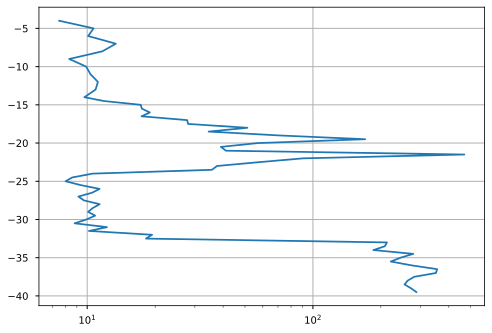

In [4]:
fig, ax = plt.subplots()
ax.semilogx(r, z)
ax.grid(True)

We mainly see four layers: 
1. a conductive (clayey) overburden of about 17m thickness, 
2. a medium resistivity interbedding of silt and sand, about 7m thick
3. again clay with 8m thickness
4. the resistive bedrock with a few hundred $\Omega$m

### The ERT data

In [5]:
data = ert.load("data/bedrock.dat")
print(data)

Data: Sensors: 64 data: 1223, nonzero entries: ['a', 'b', 'err', 'm', 'n', 'rhoa', 'valid']


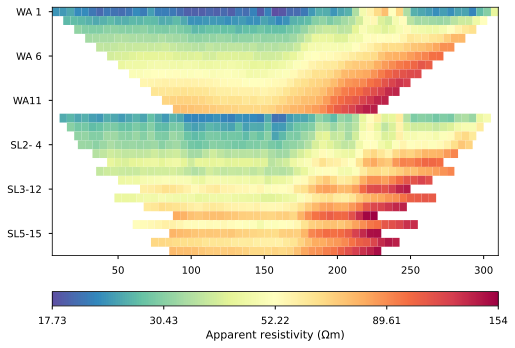

In [6]:
ert.show(data);

The apparent resistivities show increasing values with larger spacings with no observable noise. We first compute geometric factors and estimate an error model using rather low values for both error parts.

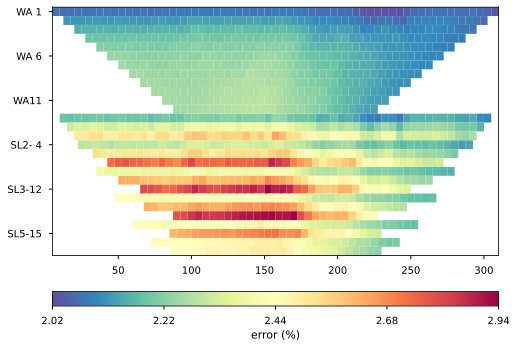

In [7]:
data["k"] = ert.geometricFactors(data)
data["err"] = ert.estimateError(data, relativeError=0.02, absoluteUError=50e-6)
ert.show(data, data["err"]*100, label="error (%)");

In [8]:
mgr = ert.ERTManager(data, verbose=True)
mgr.invert(paraDepth=80, quality=34.6, paraMaxCellSize=100)

14/06/22 - 09:46:21 - pyGIMLi - INFO - Found 2 regions.
14/06/22 - 09:46:21 - pyGIMLi - INFO - Region with smallest marker (1) set to background
14/06/22 - 09:46:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/06/22 - 09:46:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/06/22 - 09:46:21 - pyGIMLi - INFO - Use median(data values)=48.34
14/06/22 - 09:46:21 - pyGIMLi - INFO - Created startmodel from forward operator: 1674 [48.34,...,48.34]
14/06/22 - 09:46:21 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000016CC498DE70>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x0000016CC3A8FA70>
Model transformation: <pygimli.core._pygimli_.RTransLog object at 0x0000016CC49E5830>
min/max (data): 17.73/154
min/max (error): 2.02%/2.94%
min/max (start model): 48.34/48.34
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 4.12 (dPhi = 17.77%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 3.33 (dPhi = 17.18%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.39 (dPhi = 23.23%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 0.52 (dPhi = 54.25%) lam: 20.0


####################################

1674 [17.341185876547044,...,173.4188599694686]

Seems like there is a good data fit that we first look at.

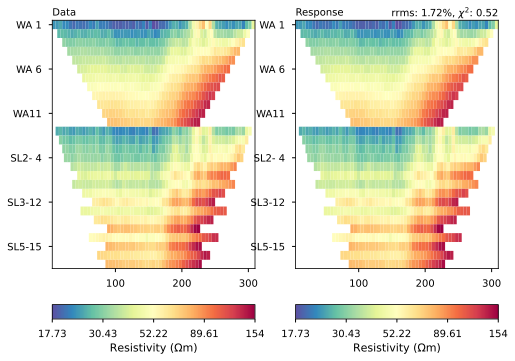

In [9]:
mgr.showFit();

Visually, they look identical, facing the magnitude of 10 is far above the error of a few percent.
Therefore we should better look at the misfit distribution.

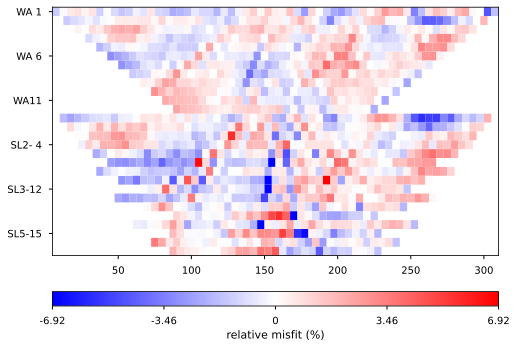

In [10]:
mgr.showMisfit()

Although it is not purely Gaussian, we don't see larger features and consider the data well fitted so that we feel qualified to have a look at the result. For reasons of comparability, we define a unique colormap and store all options in a dictionary. We plot the result with these and plot the DP points onto the mesh.

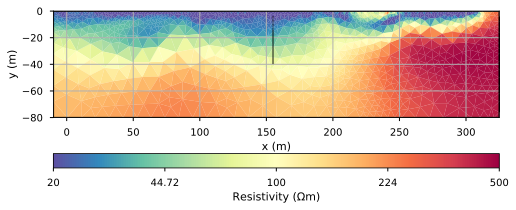

In [11]:
kw = dict(cMin=20, cMax=500, logScale=True, cMap="Spectral_r", xlabel="x (m)", ylabel="y (m)")
ax, cb = mgr.showResult(**kw)
ax.plot(x, z, ".", color="black", linestyle="None", markersize=2);
ax.grid(True)

We want to extract the resistivity from the mesh at the positions where the prior data are available. To this end, we create a list of positions (`pg.Pos` class) and use the interpolation function.

In [12]:
posVec = [pg.Pos(pos) for pos in zip(x, z)]
resMesh = pg.interpolate(srcMesh=mgr.paraDomain, inVec=mgr.model, destPos=posVec)

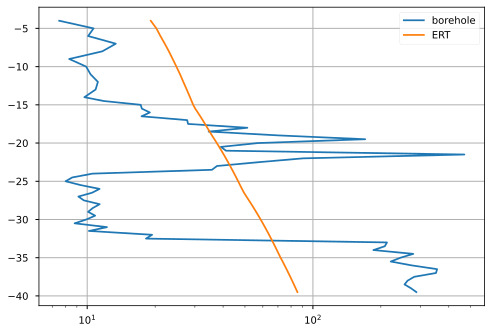

In [13]:
fig, ax = plt.subplots()
ax.semilogx(r, z, label="borehole")
ax.semilogx(resMesh.array(), z, label="ERT")
ax.grid(True)
ax.legend();

Even though the tomogram looks interesting, the resistivity seems to follow a simple gradient. This is apparently a lack of resolution. Our assumption of an overall smooth image is wrong. Therefore we use an anisotropic smoothness using the vertical weighting factor `zWeight`.

14/06/22 - 09:47:52 - pyGIMLi - INFO - Use median(data values)=48.34
14/06/22 - 09:47:52 - pyGIMLi - INFO - Created startmodel from forward operator: 1674 [48.34,...,48.34]
14/06/22 - 09:47:52 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000016CC498DE70>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x0000016CC3A8FA70>
Model transformation (cumulative):
	 0 <pygimli.core._pygimli_.RTransLogLU object at 0x0000016CC4B90170>
min/max (data): 17.73/154
min/max (error): 2.02%/2.94%
min/max (start model): 48.34/48.34
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 12.14 (dPhi = 6.22%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 11.4 (dPhi = 6.01%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 10.73 (dPhi = 5.82%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 9.98 (dPhi = 6.92%) lam: 20.0
---------------------

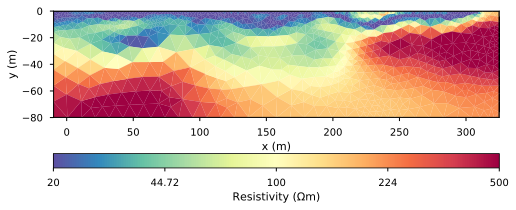

In [14]:
mgr.inv.setRegularization(zWeight=0.2)
mgr.invert()
mgr.showResult(**kw);

We observe a much more structured result with stronger vertical gradients that are, however, not continuous. In the middle of the profile we can see a short layer of increased resistivity and are interested whether we better fit the model.

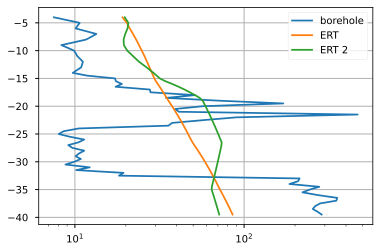

In [14]:
resMesh = pg.interpolate(srcMesh=mgr.paraDomain, inVec=mgr.model, destPos=posVec)
ax.semilogx(resMesh.array(), z, label="ERT 2")
ax.legend()
ax.figure

As alternative, we can use a geostatistic model. The vertical range can be well estimated from the DP data using a variogram analysis, we guess 5m. For the horizontal one, we can only guess a 10m higher value.

13/06/22 - 11:42:40 - pyGIMLi - INFO - Use median(data values)=48.34
13/06/22 - 11:42:40 - pyGIMLi - INFO - Created startmodel from forward operator: 1674 [48.34,...,48.34]
13/06/22 - 11:42:40 - pyGIMLi - INFO - Starting inversion.
13/06/22 - 11:42:42 - pyGIMLi - INFO - Creating GeostatisticConstraintsMatrix for region 2 with: I=[50, 5], dip=0, strike=0


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002405CBACA90>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002405CB8F180>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002405DDAF580>
min/max (data): 17.73/154
min/max (error): 2.02%/2.94%
min/max (start model): 48.34/48.34
--------------------------------------------------------------------------------


13/06/22 - 11:42:43 - pyGIMLi - INFO - (C) Time for eigenvalue decomposition: 0.6s
13/06/22 - 11:42:43 - pyGIMLi - INFO - Cache stored: C:\Users\Hang\AppData\Roaming\pygimli\Cache\16554775186214540330


--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 13.08 (dPhi = 83.33%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.71 (dPhi = 85.2%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.13 (dPhi = 30.77%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 0.3 (dPhi = 60.93%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.30)                   #
################################################################################


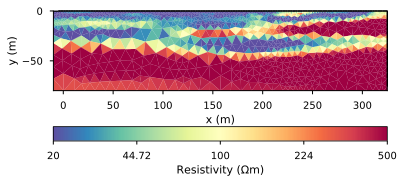

In [15]:
mgr.inv.setRegularization(2, correlationLengths=[50, 5])
mgr.invert()
mgr.showResult(**kw);

In [17]:
resMesh = pg.interpolate(srcMesh=mgr.paraDomain, inVec=mgr.model, destPos=posVec)
# ax.semilogx(resMesh, z, label="geostat")
# ax.legend()
# ax.figure

## structural constraints

The geostatistic regularization can much better detect the second conductor, however, also too deep.

One alternative is to use the interfaces as structural constraints in the neighborhood of the borehole.

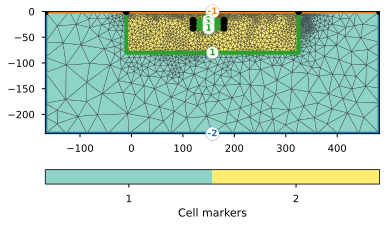

In [25]:
plc = mt.createParaMeshPLC(data, paraDepth=80, paraDX=0.5, paraMaxCellSize=50, boundary=0.5)
for zz in [17, 23.5, 32.5]:
    plc += mt.createLine([120, -zz], [180, -zz])
# ax, _ = pg.show(plc)
mesh = mt.createMesh(plc, quality=34.6)
ax, _ = pg.show(mesh, markers=True, showMesh=True)

13/06/22 - 22:44:49 - pyGIMLi - INFO - Found 2 regions.
13/06/22 - 22:44:49 - pyGIMLi - INFO - Region with smallest marker (1) set to background
13/06/22 - 22:44:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/22 - 22:44:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/06/22 - 22:44:49 - pyGIMLi - INFO - Use median(data values)=48.34
13/06/22 - 22:44:49 - pyGIMLi - INFO - Created startmodel from forward operator: 2332 [48.34,...,48.34]
13/06/22 - 22:44:49 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000024006179810>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000024007DD8CC0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000240061190E0>
min/max (data): 17.73/154
min/max (error): 2.02%/2.94%
min/max (start model): 48.34/48.34
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 5.15 (dPhi = 17.19%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 3.94 (dPhi = 21.51%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.1 (dPhi = 38.02%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 0.51 (dPhi = 51.82%) lam: 20.0


#################################################

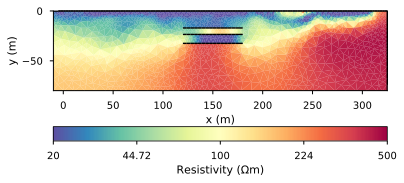

In [26]:
mgr = ert.ERTManager(data, verbose=1)
mgr.invert(mesh=mesh)
mgr.showResult(**kw);

In [44]:
C = mgr.fop.constraints()
mgr.fop.constraints
Wm_r = pg.utils.sparseMatrix2coo(C)
Wm_r = Wm_r.todense()
mgr.fop.regionProperties()

{1: {'startModel': None,
  'modelControl': 1.0,
  'zWeight': 1.0,
  'cType': None,
  'limits': [0, 0],
  'trans': 'Log',
  'background': True,
  'single': None,
  'fix': None,
  'correlationLengths': None,
  'dip': None,
  'strike': None}}

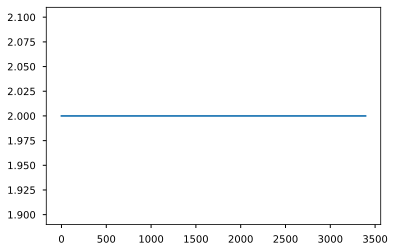

In [42]:
plt.plot(abs(Wm_r).sum(axis=1))

In [46]:
print(Wm_r.shape)
np.sum(abs(Wm_r))

(3394, 2332)


6788.0

We observe very strong gradients at the constraints, also when comparing the depth profile.

In [ ]:
resMesh = pg.interpolate(srcMesh=mgr.paraDomain, inVec=mgr.model, destPos=posVec)
fig, ax = plt.subplots()
ax.semilogx(r, z, label="borehole")
ax.semilogx(resMesh, z, label="ERT+structure")
ax.grid(True)
ax.legend();

However the quality of the image decreases away from the borehole and we cannot be sure about the assumption of straigh interfaces. Therefore we want to use the DP results as data in inversion.

### Using point data in inversion
We use the forward modelling operator from notebook 1 to model our data in a tomographic inversion. To this end we set up a new mesh without any constraints and extract the inversion part with marker 2.

In [18]:
from pygimli.frameworks import PriorModelling

mesh = mt.createParaMesh(data, paraDX=0.5, paraDepth=80, paraMaxCellSize=50, quality=34.6)
print(mesh)
para = mesh.createSubMesh(mesh.cells(mesh.cellMarkers() == 2))
print(para)
fopDP = PriorModelling(para, posVec)

13/06/22 - 11:49:27 - pyGIMLi - INFO - Found 1 regions.


Mesh: Nodes: 1835 Cells: 3467 Boundaries: 5301
Mesh: Nodes: 1228 Cells: 2246 Boundaries: 3473


We set up an inversion with this mesh, logarithmic transformations and invert the model.

13/06/22 - 11:49:29 - pyGIMLi - INFO - Use median(data values)=17.84227805
13/06/22 - 11:49:29 - pyGIMLi - INFO - Created startmodel from forward operator: 2246 [17.84227805,...,17.84227805]
13/06/22 - 11:49:29 - pyGIMLi - INFO - Starting inversion.
13/06/22 - 11:49:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


fop: <pygimli.frameworks.modelling.PriorModelling object at 0x000002405DE3CEA0>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x0000024079977AE0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000024074759B80>
min/max (data): 7.52/469
min/max (error): 10%/10%
min/max (start model): 17.84/17.84
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 27.21 (dPhi = 0.09%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 27.21 (dPhi = 0.01%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 27.21 (dPhi = 0.0%) lam: 20.0
################################################################################
#                 Abort criteria reached: dPhi = 0.0 (< 2.0%)                  #
#############

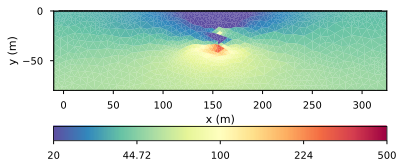

In [19]:
inv = pg.Inversion(fop=fopDP, verbose=True)
inv.mesh = para
tLog = pg.trans.TransLog()
inv.modelTrans = tLog
inv.dataTrans = tLog
inv.setRegularization(cType=1, zWeight=0.1)
model = inv.run(r, np.ones_like(r)*0.1)
pg.show(para, model, **kw);

As seen before, the DP data  work only in the neighborehood of the data. Therefore we use geostatistic regularization.

13/06/22 - 11:49:39 - pyGIMLi - INFO - Use median(data values)=17.84227805
13/06/22 - 11:49:39 - pyGIMLi - INFO - Created startmodel from forward operator: 2246 [17.84227805,...,17.84227805]
13/06/22 - 11:49:39 - pyGIMLi - INFO - Starting inversion.
13/06/22 - 11:49:39 - pyGIMLi - INFO - Creating GeostatisticConstraintsMatrix for region 2 with: I=[50, 5], dip=0, strike=0


fop: <pygimli.frameworks.modelling.PriorModelling object at 0x000002405DE3CEA0>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x0000024079977AE0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002407476FBE0>
min/max (data): 7.52/469
min/max (error): 3%/3%
min/max (start model): 17.84/17.84
--------------------------------------------------------------------------------


13/06/22 - 11:49:41 - pyGIMLi - INFO - (C) Time for eigenvalue decomposition: 1.3s
13/06/22 - 11:49:41 - pyGIMLi - INFO - Cache stored: C:\Users\Hang\AppData\Roaming\pygimli\Cache\9406186686853728172


--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 301.87 (dPhi = 0.03%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 301.87 (dPhi = 0.0%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 301.87 (dPhi = 0.0%) lam: 20.0
################################################################################
#                 Abort criteria reached: dPhi = 0.0 (< 2.0%)                  #
################################################################################


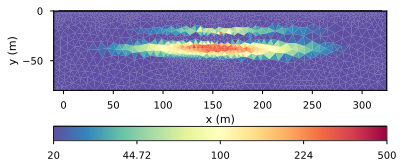

In [20]:
inv.setRegularization(correlationLengths=[50, 5])
model = inv.run(r, np.ones_like(r)*0.03)
pg.show(para, model, **kw);

Apparently, the geostatistical operator can be used to extrapolate values with given assumptions.

### Joint inversion of ERT and DP data
We now use the framework `JointModelling` to combine the ERT and the DP forward operators.
So we set up a new ERT modelling operator and join it with `fopDP`.

In [ ]:
from pygimli.frameworks import PriorModelling, JointModelling
fopERT = ert.ERTModelling()
fopERT.setMesh(mesh)
fopERT.setData(data) # not necessary as done by JointModelling
fopJoint = JointModelling([fopERT, fopDP])
fopJoint.setMesh(para)
fopJoint.setData([data, pg.Vector(r)])  # needs to have .size() attribute!

We first test the joint forward operator. We create a modelling vector of constant resistivity and distribute the model response into the two parts that can be looked at individually.

In [ ]:
model = pg.Vector(para.cellCount(), 100)
response = fopJoint(model)
respERT = response[:data.size()]
respDP = response[data.size():]
print(respDP)
ert.show(data, respERT);

In [ ]:
# test Jacobian
fopJoint.createJacobian(model)  # works
J = fopJoint.jacobian()
type(J) # wrong type

In [ ]:
pg.show(J);

In [ ]:
print(J.mat(0))
pg.show(J.mat(1), markersize=4);

In [ ]:
dataVec = np.concatenate((data["rhoa"], r))
errorVec = np.concatenate((data["err"], np.ones_like(r)*0.2))
inv = pg.Inversion(fop=fopJoint, verbose=True)
transLog = pg.trans.TransLog()
inv.modelTrans = transLog
inv.dataTrans = transLog
inv.run(dataVec, errorVec, startModel=model)

In [ ]:
pg.show(para, inv.model, **kw);

We have a local improvement of the model in the neighborhood of the borehole. Now we want to use geostatistics to get them further into the model.

In [ ]:
inv.setRegularization(2, correlationLengths=[50, 5])
model = inv.run(dataVec, errorVec, startModel=model)
pg.show(para, model, **kw);

This model much better resembles the subsurface from all data and our expectations to it.

We split the model response in the ERT part and the DP part. The first is shown as misfit.

In [ ]:
respERT = inv.response[:data.size()]
ert.show(data, respERT)
misfit = - respERT / data["rhoa"] * 100 + 100
ert.show(data, misfit, cMap="bwr", cMin=-5, cMax=5)

The second is shown as depth profile.

In [ ]:
respDP = inv.response[data.size():]
fig, ax = plt.subplots()
ax.semilogx(r, z, label="borehole")
# resMesh = pg.interpolate(srcMesh=para, inVec=inv.model, destPos=posVec)
# ax.semilogx(resMesh, z, label="ERT+DP")
ax.semilogx(respDP, z, label="response")
ax.grid(True)
ax.legend();

The model response can much better resemble the given data compared to pure interpolation.

### Take-away messages
* (ERT) data inversion is highly ambiguous, particularly for hidden layers
* prior data can help to improve regularization
* structural data can be of great help, but only if extended
* point data improve images, but only locally with smoothness constraints
* geostatistical regularization can extrapolate point data
* incorporation of prior data with geostatistic regularization is best and simple